<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [5]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

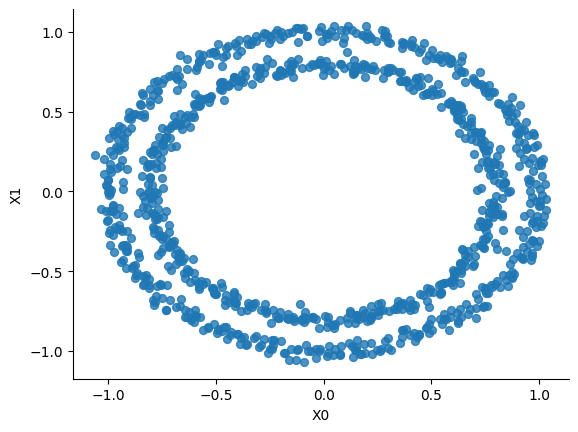

In [6]:
from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

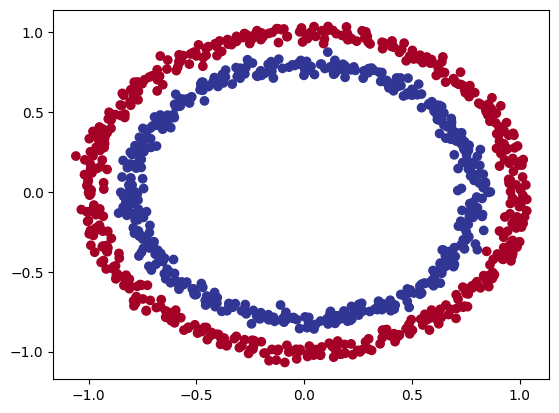

In [7]:
 # Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [10]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [11]:
import tensorflow as tf

In [12]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 8ms/step - loss: 3.5395 - accuracy: 0.4920
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 0.8323 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 9ms/step - loss: 0.7214 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7027 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6967 - accuracy: 0.5020


In [13]:
# Let's try and improve our model by training longer...
model.fit(X, y, epochs=200, verbose=0)

In [14]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [17]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [18]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [19]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.5030


[0.7028001546859741, 0.503000020980835]

to visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as align between zones (where each unique class falls).

In [20]:
import numpy as np

In [21]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


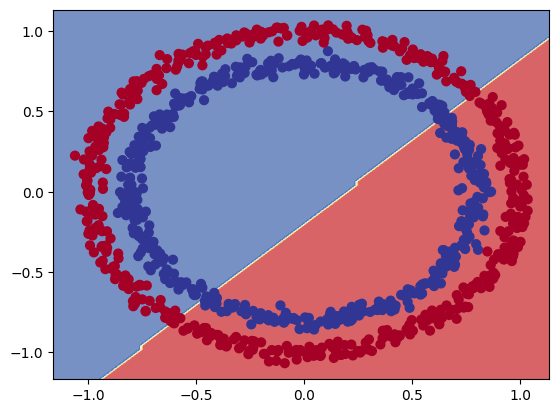

In [22]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [23]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(199, 1199, 5) #  y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [24]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
#model_4.fit(X_reg_train, y_reg_train, epochs=100)

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 689.1270 - mae: 689.1270
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 566.7723 - mae: 566.7723
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 449.9980 - mae: 449.9980
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 329.3495 - mae: 329.3495
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 203.6216 - mae: 203.6216
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 91.5884 - mae: 91.5884
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 115.4958 - mae: 115.4958
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 121.2932 - mae: 121.2932
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 99.6221 - mae: 99.6221
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 86.2645 - mae: 86.2645
Epoch 11/100
5/5 [========================

2/2 [==============================] - 0s 6ms/step


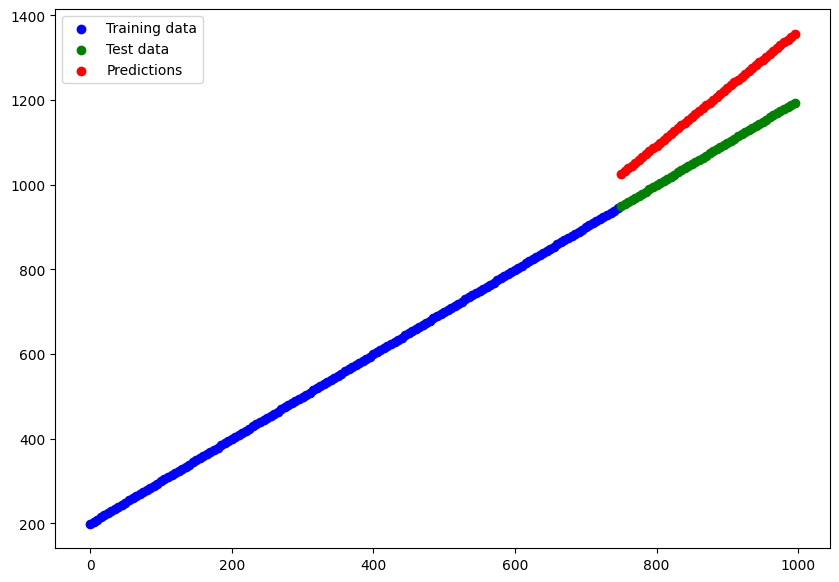

In [25]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [26]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.5316 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4721 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4386 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.4303 - accuracy: 0.4750
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 4.4243 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4189 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 8ms/step - loss: 4.4139 - accuracy: 0.4760
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 4.4154 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 4.4031 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 4.3990 - accuracy: 0.4730
Epoch 11/

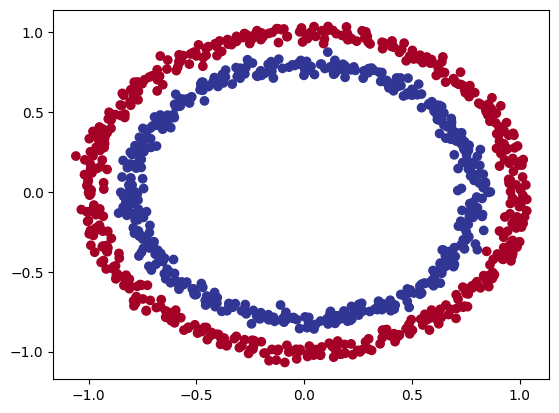

In [27]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


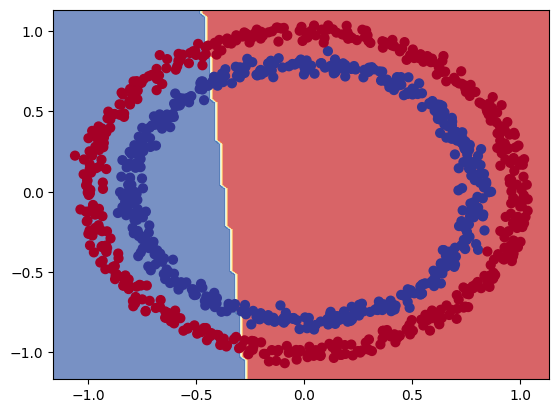

In [28]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# Fit the model
history = model_6.fit(X, y, epochs=100 )

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3254 - accuracy: 0.4120
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1907 - accuracy: 0.4130
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1069 - accuracy: 0.4300
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0518 - accuracy: 0.4370
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9839 - accuracy: 0.4430
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8883 - accuracy: 0.4530
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8514 - accuracy: 0.4570
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8233 - accuracy: 0.4580
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7520 - accuracy: 0.4620
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6107 - accuracy: 0.4610
Epoch 11/

In [30]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 1.4570 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0423 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9506 - accuracy: 0.4900
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8944 - accuracy: 0.4480
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.4630
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8327 - accuracy: 0.4640
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8169 - accuracy: 0.4730
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.8055 - accuracy: 0.4620
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7967 - accuracy: 0.4330
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.7896 - accuracy: 0.4260
Epoch 11/

In [31]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1062 - accuracy: 0.9790


[0.10620138049125671, 0.9789999723434448]

313/313 [==============================] - 0s 1ms/step
doing binary classification


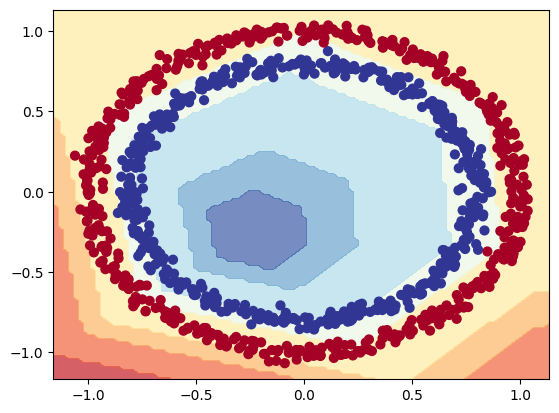

In [32]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [33]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.7228 - accuracy: 0.4980
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7048 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.4130
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4090
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6847 - accuracy: 0.5470
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.5780
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5740
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5620
Epoch 11/

In [34]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9920


[0.07688113301992416, 0.9919999837875366]

313/313 [==============================] - 0s 1ms/step
doing binary classification


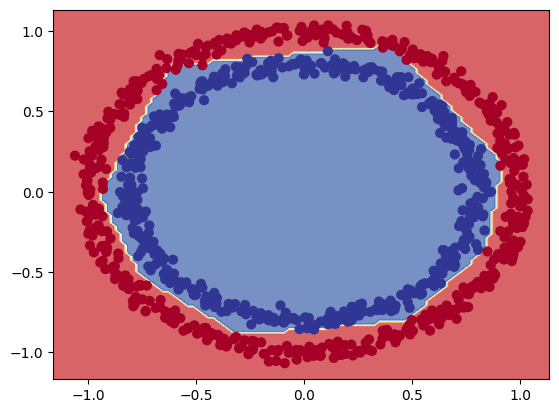

In [35]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_8, X, y)

In [36]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

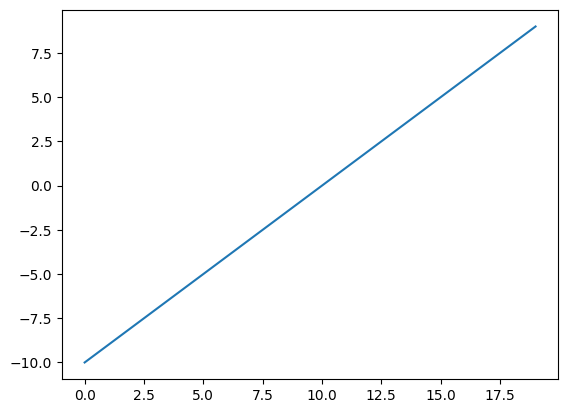

In [37]:
# Visualize our toy tensor
plt.plot(A);

In [38]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

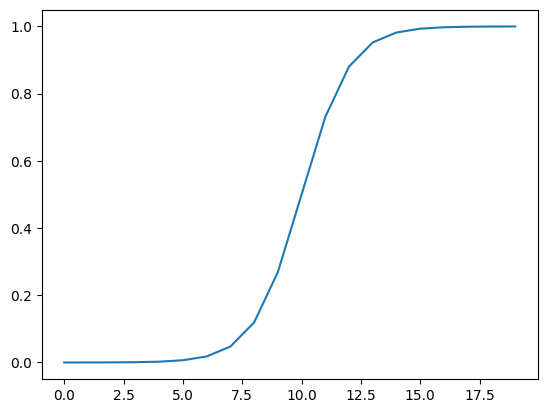

In [39]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [40]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

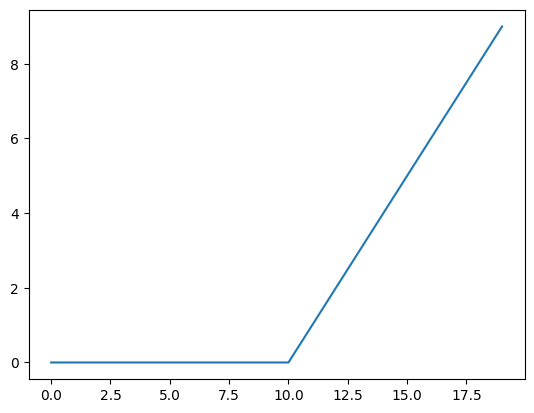

In [41]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [42]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

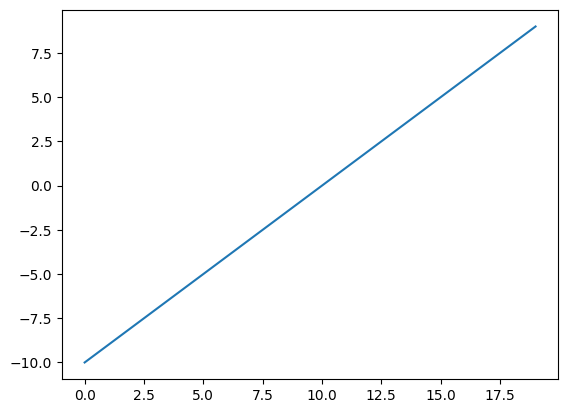

In [43]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [44]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [45]:
# Check how many examples we have
len(X)

1000

In [46]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [47]:
# Let's recreate a model to fit the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.7025 - accuracy: 0.4875
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5238
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6844 - accuracy: 0.5100
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5238
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5487
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6804 - accuracy: 0.5150
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5350
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5350
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5512
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5325
Epoch 11/50
25/25 [

In [48]:
# Evaluate
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9850


[0.08695153892040253, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


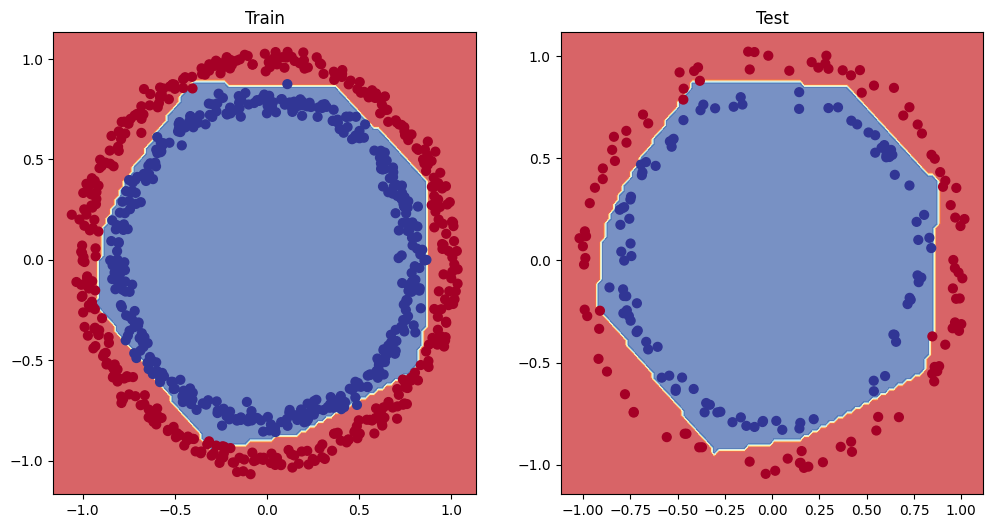

In [49]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # We want to create a subplot, 1row, 2col, 1st value will be the training plot
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)  # We want a second subplot, it is going to be "Test"
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [50]:
history.history

{'loss': [0.7024620771408081,
  0.6876586675643921,
  0.6844434142112732,
  0.6822425723075867,
  0.6815807819366455,
  0.6803648471832275,
  0.6765018701553345,
  0.6758400201797485,
  0.67388516664505,
  0.6712166666984558,
  0.6689006686210632,
  0.6672126054763794,
  0.6680532097816467,
  0.6598274111747742,
  0.6570731997489929,
  0.649224042892456,
  0.6465163230895996,
  0.6374919414520264,
  0.6319327354431152,
  0.618792712688446,
  0.6061946749687195,
  0.58974289894104,
  0.5715364217758179,
  0.539265513420105,
  0.5122498869895935,
  0.49120381474494934,
  0.4742235839366913,
  0.4563065767288208,
  0.4420919716358185,
  0.4224761724472046,
  0.4084223210811615,
  0.38960468769073486,
  0.3528751730918884,
  0.3266831636428833,
  0.30245867371559143,
  0.28603750467300415,
  0.2551056444644928,
  0.23545876145362854,
  0.2195350080728531,
  0.1954921931028366,
  0.17632539570331573,
  0.16615545749664307,
  0.15367169678211212,
  0.13897934556007385,
  0.13024279475212097,

In [51]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.702462,0.48750
1,0.687659,0.52375
2,0.684443,0.51000
3,0.682243,0.52375
4,0.681581,0.54875
5,0.680365,0.51500
6,0.676502,0.53500
7,0.675840,0.53500
8,0.673885,0.55125
9,0.671217,0.53250


Text(0.5, 1.0, 'Model_8 loss curves')

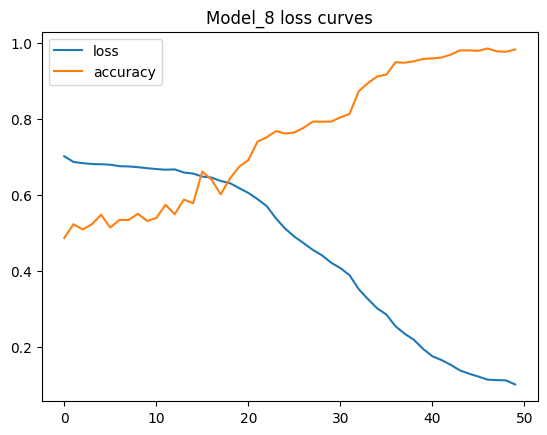

In [52]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [53]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.6942 - accuracy: 0.5238 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 0.6942 - accuracy: 0.5175 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5200 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5225 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5238 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5188 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5138 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5175 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - los

<Axes: xlabel='epochs'>

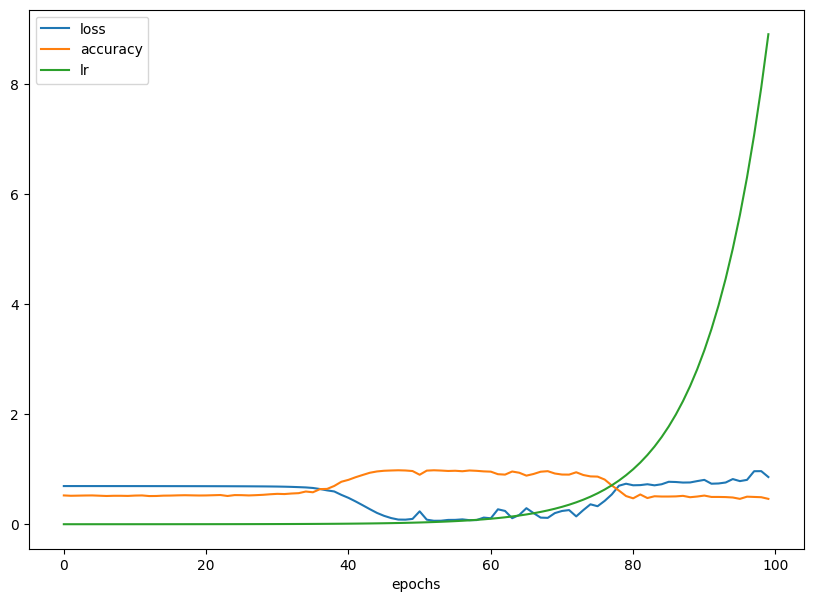

In [54]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

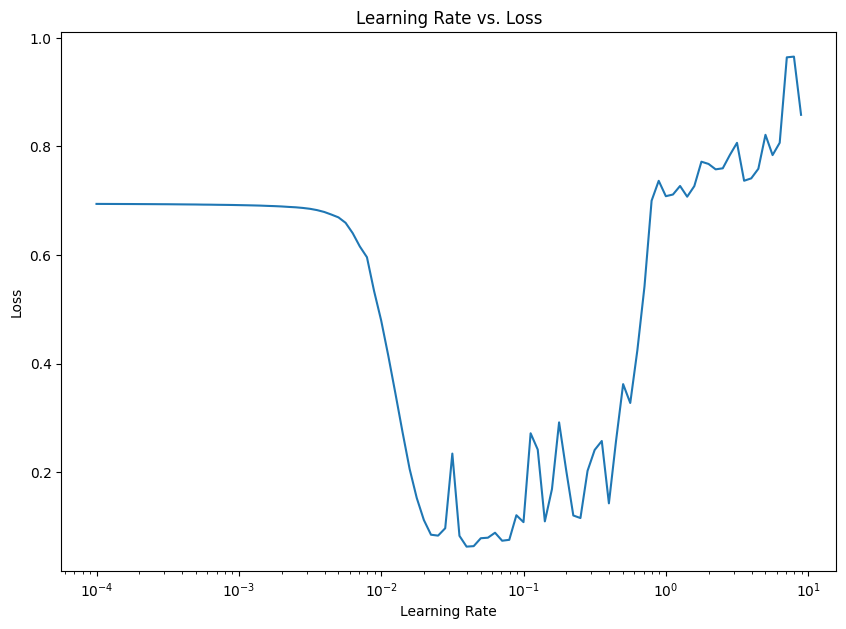

In [55]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])  # log on x scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [56]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [57]:
# Let's try using a higher *ideal* learning rate with the same model as before.

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 5ms/step - loss: 0.6938 - accuracy: 0.4950
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6846 - accuracy: 0.5387
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.6700
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.6775
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7862
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.9075
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.9325
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2322 - accuracy: 0.9762
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1764 - accuracy: 0.9912
Epoch 11/20
25/25 [

In [58]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9950


[0.048440832644701004, 0.9950000047683716]

In [59]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0870 - accuracy: 0.9850


[0.08695153892040253, 0.9850000143051147]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


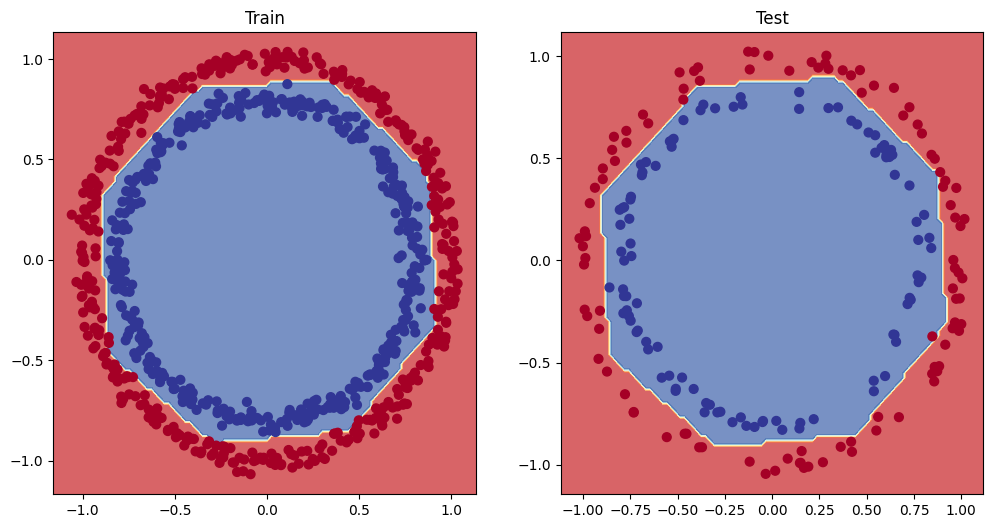

In [61]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1,)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification ewaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)
